In [2]:
import numpy as np
import torch
from torch import nn
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt
from generator import Generator5

In [3]:
cuda = True if torch.cuda.is_available() else False

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

z_discrete = 20
z_continuous = 80
latent_dim = z_discrete + z_continuous

# Initialize generator
generator = Generator5(latent_dim).to(device)
# generator.load_state_dict(torch.load('models/generator_22_06_24_10_02.model', map_location=device))


Using cpu device


In [4]:
zd = torch.Tensor(np.random.randint(0, 10, (2, z_discrete)))
zc = torch.Tensor(np.random.normal(0, 1, (2, z_continuous)))
z = torch.cat([zd, zc], dim=1)

In [88]:
def denormalize(t):
    return t * 0.5 + 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


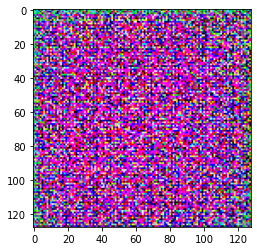

In [7]:
zd = torch.Tensor(np.random.randint(0, 10, (2, z_discrete)))
zc = torch.Tensor(np.random.normal(0, 1, (2, z_continuous)))
z = torch.cat([zd, zc], dim=1)
gen_img = generator(z)[0].detach()
plt.imshow(gen_img.permute(1,2,0))


In [110]:
Z = []
for i in range(10):
    zt = torch.zeros_like(z) + z
    zt[:,0] += i
    Z.append(zt)
len(Z)

10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


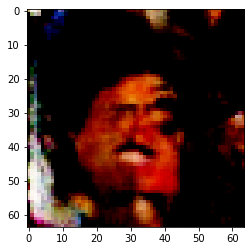

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


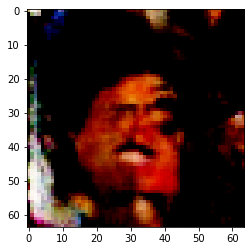

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


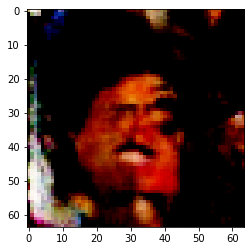

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


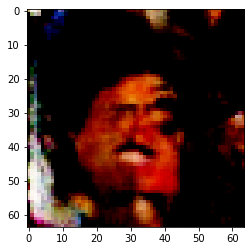

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


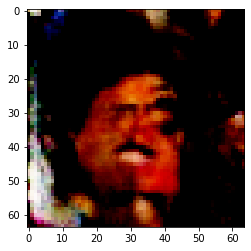

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


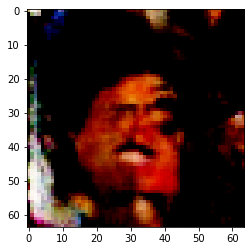

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


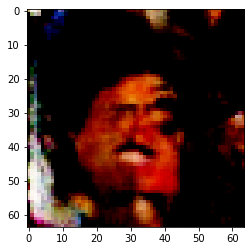

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


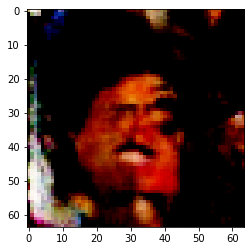

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


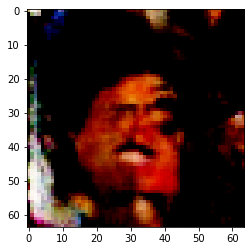

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


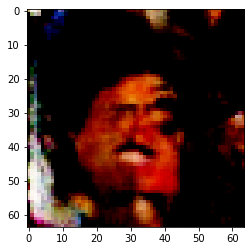

In [111]:
import imageio

gif_images = []
for _z in Z:
    gen_img = generator(_z)[0].detach()
    gif_images.append(gen_img.permute(1,2,0))
    plt.figure()
    plt.imshow(gen_img.permute(1,2,0))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


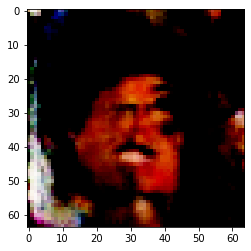

In [108]:
plt.imshow(gif_images[0])

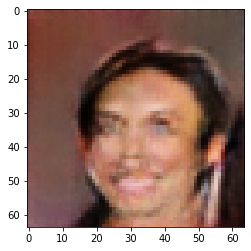

In [46]:
zd = torch.Tensor(np.random.randint(0, 10, (128, z_discrete)))
zc = torch.Tensor(np.random.normal(0, 1, (128, z_continuous)))
z = torch.cat([zd, zc], dim=1)

gen_img = generator(z)[0].detach()

t = gen_img * 0.5 + 0.5

fig = plt.figure()
plt.imshow( t.permute(1,2,0) )
plt.show()

In [4]:
zd1 = torch.Tensor(np.random.randint(0, 10, (2, z_discrete)))
zc1 = torch.Tensor(np.random.normal(0, 1, (2, z_continuous)))
z1 = generator(torch.cat([zd1, zc1], dim=1))[0].detach()

zd2 = torch.Tensor(np.random.randint(0, 10, (2, z_discrete)))
zc2 = torch.Tensor(np.random.normal(0, 1, (2, z_continuous)))
z2 = generator(torch.cat([zd2, zc2], dim=1))[0].detach()


N = 100

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


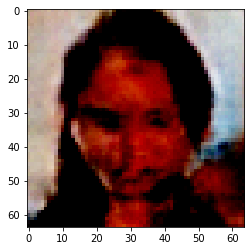

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


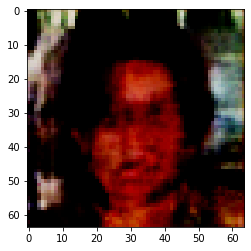

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


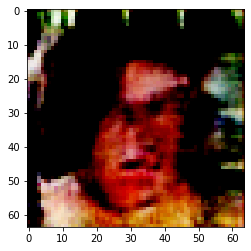

In [5]:
from matplotlib import animation

def draw_frame(n):
    a = n / N
    _z = a * z1 + (1-a) * z2
    return _z.permute(1,2,0)

for i in range(3):
    plt.figure()
    plt.imshow(draw_frame(i*50))
    plt.show()

In [6]:
zd1 = torch.Tensor(np.random.randint(0, 10, (2, z_discrete)))
zc1 = torch.Tensor(np.random.normal(0, 1, (2, z_continuous)))
z1 = torch.cat([zd1, zc1], dim=1)

zd2 = torch.Tensor(np.random.randint(0, 10, (2, z_discrete)))
zc2 = torch.Tensor(np.random.normal(0, 1, (2, z_continuous)))
z2 = torch.cat([zd2, zc2], dim=1)

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0), Output()), _dom_classes=('widget-inter…

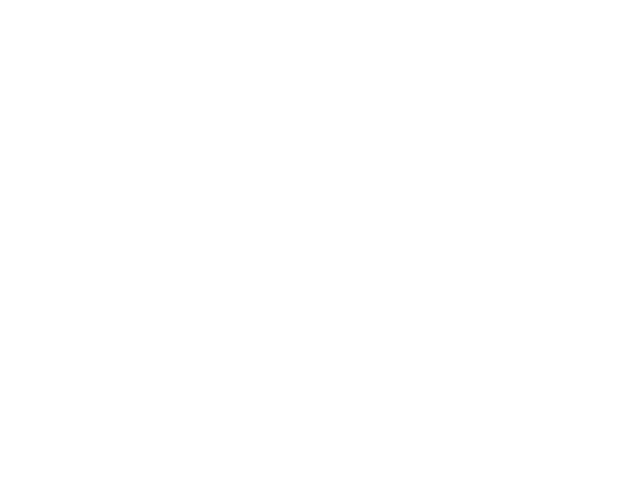

In [8]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# set up plot
plt.figure()

 
@widgets.interact(x=(0, 1, 0.1))
def update(x=0):
    """Remove old lines from plot and plot new one"""
    z = x * z1 + (1-x) * z2
    img = generator(z)[0].detach()
    img = torch.as_tensor(255 * (img - img.min()) / (img.max() - img.min()), dtype=torch.uint8)
    plt.figure()
    plt.imshow(img.permute(1,2,0))
    plt.show()